<a href="https://colab.research.google.com/github/anlianguzova/Python_BI_2022/blob/hw_6_re/code/hw_6_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import re
import matplotlib.pyplot as plt
from collections import Counter

### References

In [ ]:
path_to_the_file = 'data/references.txt' # could be changed

with open(f'{path_to_the_file}') as references:
    references = references.read()
    ftp_sep = re.sub(r';', ' ', references)
    ftps = re.findall(r'ftp[\w./]+', ftp_sep)

with open(r'data/ftps.txt', 'w') as ftps_file:
    ftps_file.write('\n'.join(str(ftp) for ftp in ftps))

### 2430 AD

In [4]:
path_to_the_file = 'data/2430AD.txt' # could be changed

with open(f'{path_to_the_file}') as story:
    story = story.read()
    # Getting numbers
    story_num = re.findall(r'\d+[0-9.]+', story)
    # a/A-containing words
    a_words = re.findall(r'\w*a+\w*', story, flags=re.IGNORECASE)
    # exclamatory sentences
    exclam_sent = re.findall(r'[\w,\s]+!', story)
    # unique words
    words = re.findall(r'[a-zA-z\'\-]+', story)
    unique_words = list(set(map(lambda string: string.lower(), words)))


### Histogram

In [5]:
length_words = list(map(lambda word: len(word), unique_words))
len_occurrence = Counter(length_words)

In [6]:
lengths = list(len_occurrence.keys())

occurrences = list(len_occurrence.values())
portion = []
for value in occurrences:
    portion.append(value/sum(len_occurrence.values()))

Text(0, 0.5, 'Occurrence of the words')

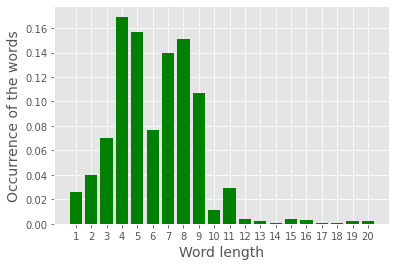

In [7]:
plt.style.use('ggplot')
plt.bar(list(map(str, sorted(lengths))), portion, color='green')
plt.xlabel('Word length', fontsize=14)
plt.ylabel('Occurrence of the words', fontsize=14)

### Translate

In [ ]:
def translate(string: str) -> str:
    vowels = 'ауоыэяюёиеАУОЫЭЯЮЁИЕ'
    return re.sub(fr'([{vowels}])', fr'\1к\1', string, flags=re.IGNORECASE)

### Additional task

In [ ]:
def word_count(text: str) -> int:
    return len(re.findall(r'[a-zA-Zа-яА-Я\-]+', text))

def find_n_word_sentences(string: str, n: int) -> list:
    sentences = re.findall(r'[\w,:\s]+', string)
    suitable_sentences = list(filter(lambda x: word_count(x) == n, sentences))
    ans = []
    for sent in suitable_sentences:
        ans.append(tuple(sent.split()))
    return ans